In [2]:
# import the libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as m

from datetime import datetime as dt

In [15]:
mt_ratings = pd.read_csv('MovieTweetings-master/latest/ratings.dat', 
                         delimiter='::', 
                         names=['user_id', 'movie_id', 'rating', 'timestamp'],
                         index_col = 3,
                         parse_dates=True)

mt_ratings.index = pd.to_datetime(mt_ratings.index ,unit='s')
mt_ratings = mt_ratings.sort_index()

C:\Users\Panangam\Anaconda3\envs\python2\lib\site-packages\ipykernel\__main__.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
C:\Users\Panangam\Anaconda3\envs\python2\lib\site-packages\ipykernel\__main__.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [23]:
mt_ratings.head(10)

,user_id,movie_id,rating
timestamp,,,
2013-02-28 14:38:27,36568,2171847,6
2013-02-28 14:43:44,32501,444778,8
2013-02-28 14:47:18,6227,1411238,6
2013-02-28 14:58:23,42816,1496422,7
2013-02-28 15:00:53,33145,118799,5
2013-02-28 15:04:39,33145,338013,4
2013-02-28 15:05:06,2545,1003052,8
2013-02-28 15:07:27,33145,64665,8
2013-02-28 15:08:24,40159,884328,7


In [103]:
mt_movies = pd.read_csv('MovieTweetings-master/latest/movies.dat', 
                        delimiter='::', 
                        names=['movie_id', 'title', 'genre_str'],
                        index_col=0)

C:\Users\Panangam\Anaconda3\envs\python2\lib\site-packages\ipykernel\__main__.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [104]:
mt_movies.head(10)
# movie_id is IMDB ID

,title,genre_str
movie_id,,
8,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
10,La sortie des usines Lumière (1895),Documentary|Short
12,The Arrival of a Train (1896),Documentary|Short
25,The Oxford and Cambridge University Boat Race ...,NaN
91,Le manoir du diable (1896),Short|Horror
417,Le voyage dans la lune (1902),Short|Adventure|Fantasy
439,The Great Train Robbery (1903),Short|Action|Crime
443,"Hiawatha, the Messiah of the Ojibway (1903)",NaN
628,The Adventures of Dollie (1908),Action|Short


In [105]:
# load boxofficemojo
boxoffice = pd.read_csv('BoxOfficeMojo-Data-Sheet1-3-6-2018-csv-refined.csv', 
                       delimiter=',',
                       parse_dates=[7,8])

# parse numeric columns
cols_to_parse_num = ['total_gross', 'total_theaters', 'opening_gross', 'opening_theaters']
for col in cols_to_parse_num:
    boxoffice[col] = boxoffice[col].str.replace('$','')
    boxoffice[col] = boxoffice[col].str.replace(',','')
    boxoffice[col] = pd.to_numeric(boxoffice[col])
    
# choose only data with proper open_dates
boxoffice = boxoffice[(boxoffice.open_date.str.len() == 10) & (boxoffice.close_date.str.len() == 10)]

for col in ['open_date', 'close_date']:
    boxoffice[col] = pd.to_datetime(boxoffice[col])

In [106]:
boxoffice.head(10)

,rank_by_year,title,studio,total_gross,total_theaters,opening_gross,opening_theaters,open_date,close_date
0,1.0,Star Wars: The Force Awakens,BV,936662225.0,4134.0,247966675.0,4134.0,2015-12-18,2016-06-02
1,2.0,Jurassic World,Uni.,652270625.0,4291.0,208806270.0,4274.0,2015-06-12,2015-11-19
2,3.0,Avengers: Age of Ultron,BV,459005868.0,4276.0,191271109.0,4276.0,2015-05-01,2015-10-08
3,4.0,Inside Out,BV,356461711.0,4158.0,90440272.0,3946.0,2015-06-19,2015-12-10
4,5.0,Furious 7,Uni.,353007020.0,4022.0,147187040.0,4004.0,2015-04-03,2015-07-24
5,6.0,Minions,Uni.,336045770.0,4311.0,115718405.0,4301.0,2015-07-10,2015-12-17
6,7.0,The Hunger Games: Mockingjay - Part 2,LGF,281723902.0,4175.0,102665981.0,4175.0,2015-11-20,2016-02-25
7,8.0,The Martian,Fox,228433663.0,3854.0,54308575.0,3831.0,2015-10-02,2016-03-17
8,9.0,Cinderella (2015),BV,201151353.0,3848.0,67877361.0,3845.0,2015-03-13,2015-09-17
9,10.0,Spectre,Sony,200074609.0,3929.0,70403148.0,3929.0,2015-11-06,2016-04-07


In [4]:
# Some description of data set
print 'Movies count: %d' % len(mt_movies)
print 'Ratings count: %d' % len(mt_ratings)

most_rated_id = mt_ratings.groupby('movie_id').rating.count().argmax()
most_rated = mt_movies.query('movie_id==@most_rated_id').iloc[0].title
print 'Most rated: %s (rated %d times))' % (most_rated, mt_ratings.groupby('movie_id').rating.count().max())
movie_rating_freq = mt_ratings.groupby('movie_id').rating.count()

print 

print 'Movies with >500 ratings: %d' % movie_rating_freq[movie_rating_freq > 500].count()
print 'Total ratings count: %d' % movie_rating_freq[movie_rating_freq > 500].sum()

Movies count: 30395
Ratings count: 686954
Most rated: Gravity (2013) (rated 3018 times))

Movies with >500 ratings: 249
Total ratings count: 244281


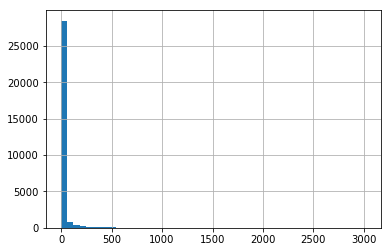

In [5]:
movie_rating_freq.hist(bins=50)

Movies with >500 ratings: 249
Total ratings count: 244281


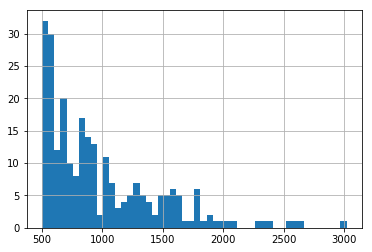

In [6]:
min_rating_count = 500

movie_rating_freq = mt_ratings.groupby('movie_id').rating.count()
selected_movies = movie_rating_freq[movie_rating_freq > 500]
print 'Movies with >%d ratings: %d' % (min_rating_count, selected_movies.count())
print 'Total ratings count: %d' % selected_movies.sum()
selected_movies.hist(bins=50)

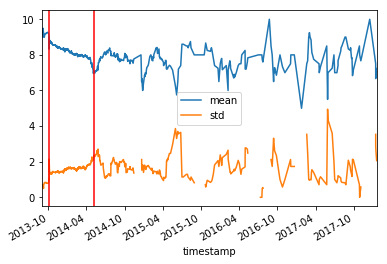

In [8]:
# Test rolling stats on Gravity (2013)
test_movie_id = 1454468
test_ratings = mt_ratings.query('movie_id==@test_movie_id')['rating']
test_ratings.rolling('30d').mean().plot()
test_ratings.rolling('30d').std().plot()
plt.legend(['mean', 'std'])
plt.axvline(x=pd.Timestamp(year=2013, month=10, day=4), color='red')
plt.axvline(x=pd.Timestamp(year=2014, month=5, day=8), color='red')

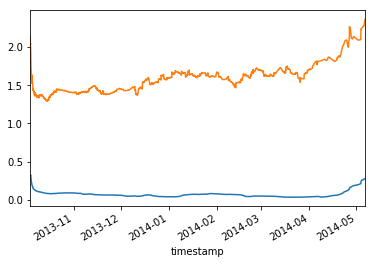

In [50]:

test_ratings.rolling('30d') \
    .mean() \
    .rolling('30d') \
    .std() \
    [pd.Timestamp(year=2013, month=10, day=4) : pd.Timestamp(year=2014, month=5, day=8)] \
    .plot()

test_ratings.rolling('30d') \
    .std() \
    [pd.Timestamp(year=2013, month=10, day=4) : pd.Timestamp(year=2014, month=5, day=8)] \
    .plot()

In [8]:
def step_rolling_count(series, window, step):
    

IndentationError: expected an indented block (<ipython-input-8-dfec2bff56f6>, line 2)

In [ ]:
sample_df.rolling(3, center=True).count()

In [225]:
help(pd.tseries.offsets.DateOffset)

Help on class DateOffset in module pandas.tseries.offsets:

class DateOffset(__builtin__.object)
 |  Standard kind of date increment used for a date range.
 |  
 |  Works exactly like relativedelta in terms of the keyword args you
 |  pass in, use of the keyword n is discouraged-- you would be better
 |  off specifying n in the keywords you use, but regardless it is
 |  there for you. n is needed for DateOffset subclasses.
 |  
 |  DateOffets work as follows.  Each offset specify a set of dates
 |  that conform to the DateOffset.  For example, Bday defines this
 |  set to be the set of dates that are weekdays (M-F).  To test if a
 |  date is in the set of a DateOffset dateOffset we can use the
 |  onOffset method: dateOffset.onOffset(date).
 |  
 |  If a date is not on a valid date, the rollback and rollforward
 |  methods can be used to roll the date to the nearest valid date
 |  before/after the date.
 |  
 |  DateOffsets can be created to move dates forward a given number of
 |  val